In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
plt.style.use('ggplot')
pd.get_option("display.max_columns",None)
pd.get_option("display.max_rows", None)
import seaborn as sns
import matplotlib.font_manager
from matplotlib.colors import LinearSegmentedColormap

#import plotly.plotly  as py
#import plotly.graph_objs as go
#plotly.tools.set_credentials_file(username='***', api_key='***')

In [2]:
pre_app = pd.read_csv('pre_app_clean.csv')
app = pd.read_csv('app_clean.csv')

In [3]:
app = pre_app.merge(app, how = 'inner', on = 'id_curr')

In [4]:
target1 = app[app['target'] == 1]
target0 = app[app['target'] == 0]

In [5]:
men = app[app['gender'] == 'M']
women = app[app['gender'] == 'F']


In [6]:
rej = app[app['status'] == 'Refused']
approv = app[app['status'] == 'Approved']


In [7]:
type_credit = app['credit_type'].value_counts()
type_credit = (type_credit/app.shape[0])*100
type_credit

Cash loans         91.611302
Revolving loans     8.388698
Name: credit_type, dtype: float64

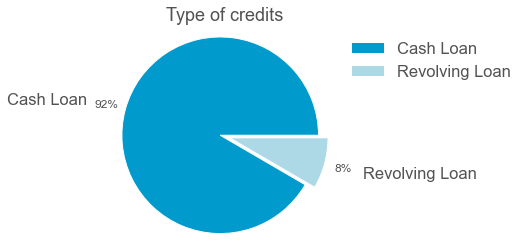

In [56]:
fig, ax = plt.subplots()

plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['text.color'] = '#525252'
plt.rcParams['axes.labelcolor']= '#525252'
plt.rcParams['xtick.color'] = '#525252'
plt.rcParams['ytick.color'] = '#525252'
plt.rcParams['font.size']=12

color_palette_list = ['#009ACD', '#ADD8E6', '#63D1F4', '#0EBFE9',   
                      '#C1F0F6', '#0099CC']

labels = ['Cash Loan', 'Revolving Loan']
percentages = [type_credit[0], type_credit[1]]
explode=(0.1,0)

ax.pie(percentages, explode=explode, labels=labels,  
       colors=color_palette_list[0:2], autopct='%1.0f%%', 
       shadow=False, startangle=0,   
       pctdistance=1.2,labeldistance=1.4)
ax.axis('equal')
ax.set_title("Type of credits", color = '#525252')
ax.legend(frameon=False, bbox_to_anchor=(1.4,1))

plt.savefig('./Figures/credit_type.png', bbox_inches = 'tight')


In [57]:
tt = target1['credit_type'].value_counts()
print(tt)

tttt = target0['credit_type'].value_counts()
print(tttt)
total = app['credit_type'].value_counts()
print(total)

tt = (tt/app.shape[0])*100
tttt = (tttt/app.shape[0])*100

credit_type_default = [tttt[0],tt[0],tttt[1],tt[1]]
credit_type_default = np.array(credit_type_default)
print(credit_type_default)
type(credit_type_default)

Cash loans         92928
Revolving loans     4822
Name: credit_type, dtype: int64
Cash loans         839359
Revolving loans     80546
Name: credit_type, dtype: int64
Cash loans         932287
Revolving loans     85368
Name: credit_type, dtype: int64
[82.47972053  9.13158192  7.91486309  0.47383445]


numpy.ndarray

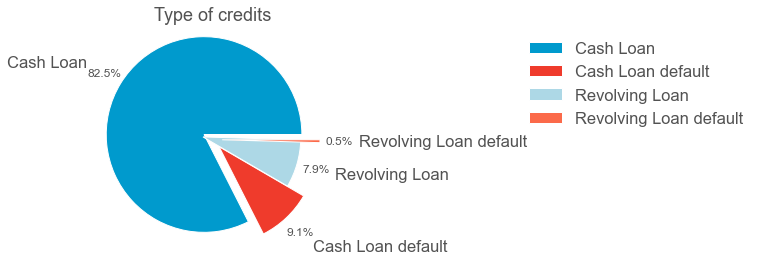

In [58]:
fig, ax = plt.subplots()

plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['text.color'] = '#525252'
plt.rcParams['axes.labelcolor']= '#525252'
plt.rcParams['xtick.color'] = '#525252'
plt.rcParams['ytick.color'] = '#525252'
plt.rcParams['font.size']=12

color_palette_list = ['#009ACD', '#ef3b2c','#ADD8E6', '#fb6a4a']

labels = ['Cash Loan', 'Cash Loan default','Revolving Loan','Revolving Loan default']
percentages = credit_type_default
explode=(0.1,0.1,-0.1,0.1)

ax.pie(percentages, explode=explode, labels=labels,  
       colors=color_palette_list, autopct='%1.1f%%', 
       shadow=False, startangle=0,   
       pctdistance=1.2,labeldistance=1.4)
ax.axis('equal')
ax.set_title("Type of credits", color = '#525252')
ax.legend(frameon=False, bbox_to_anchor=(1.4,1))

plt.savefig('./Figures/credit_type.png', bbox_inches = 'tight')


In [59]:
credit_gender = app['gender'].value_counts()
credit_gender = (credit_gender/app.shape[0])*100
credit_gender


F    63.533024
M    36.466976
Name: gender, dtype: float64

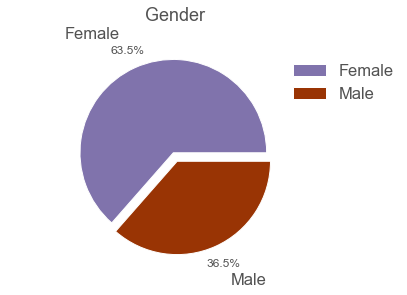

In [60]:



fig, ax = plt.subplots()

#plt.rcParams['font.sans-serif'] = 'Arial'
#plt.rcParams['font.family'] = 'sans-serif'
#plt.rcParams['text.color'] = '#525252'
#plt.rcParams['axes.labelcolor']= '#525252'
#plt.rcParams['xtick.color'] = '#525252'
#plt.rcParams['ytick.color'] = '#525252'
#plt.rcParams['font.size']=12

color_palette_list = ['#8073ac', '#993404']

labels = ['Female', 'Male']
percentages = credit_gender
explode=(0.1,0)

ax.pie(percentages, explode=explode, labels=labels,  
       colors=color_palette_list, autopct='%1.1f%%', 
       shadow=False, startangle=0,   
       pctdistance=1.2,labeldistance=1.4)
ax.axis('equal')
ax.set_title("Gender", color = '#525252',y=1.1)
ax.legend(frameon=False, bbox_to_anchor=(1.2,1))

plt.savefig('./Figures/credit_gender.png', bbox_inches = 'tight')


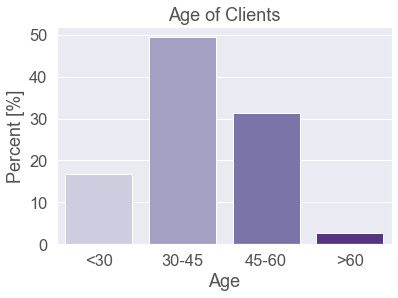

In [61]:
# Percentage of defaults (defaults per age group compared to total defaults)

age =app['age_range'].value_counts()
total = app.shape[0]
age_perc = (age/total)*100
age_perc = age_perc.sort_values(ascending = False)

ax = sns.barplot(x = age_perc.index, y = age_perc.values,\
                order = ['<30','30-45','45-60','>60'],\
                 palette = ['#cbc9e2','#9e9ac8','#756bb1','#54278f'])
ax.set(xlabel = 'Age', ylabel ='Percent [%]')

ax.set_title('Age of Clients', color = '#525252')

plt.savefig('./Figures/credit_age.png', bbox_inches = 'tight')


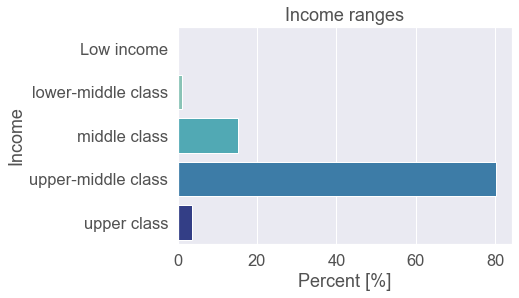

In [62]:
# Percentage of defaults (defaults per age group compared to total defaults)

inc =app['income_range'].value_counts()
total = app.shape[0]
inc_perc = (inc/total)*100
inc_perc = inc_perc.sort_values(ascending = False)

ax = sns.barplot(y = inc_perc.index, x = inc_perc.values,\
                order = ['Low income','lower-middle class','middle class',\
                                'upper-middle class','upper class'],\
                 palette = ['#c7e9b4','#7fcdbb','#41b6c4','#2c7fb8','#253494'])
ax.set(ylabel = 'Income', xlabel ='Percent [%]')

ax.set_title('Income ranges', color = '#525252')

plt.savefig('./Figures/income.png', bbox_inches = 'tight')


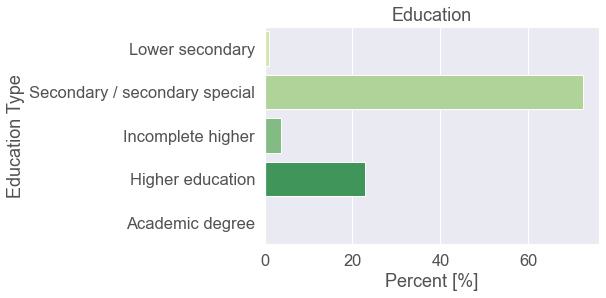

In [63]:

edu =app['education'].value_counts()
total = app.shape[0]
edu_perc = (edu/total)*100
edu_perc = edu_perc.sort_values(ascending = False)

ax = sns.barplot(y = edu_perc.index, x = edu_perc.values,\
                 order = ['Lower secondary','Secondary / secondary special','Incomplete higher',
                          'Higher education','Academic degree'],\
                 palette = ['#d9f0a3','#addd8e','#78c679','#31a354','#006837'])
ax.set(ylabel = 'Education Type', xlabel ='Percent [%]')

ax.set_title('Education', color = '#525252')

plt.savefig('./Figures/education.png', bbox_inches = 'tight')


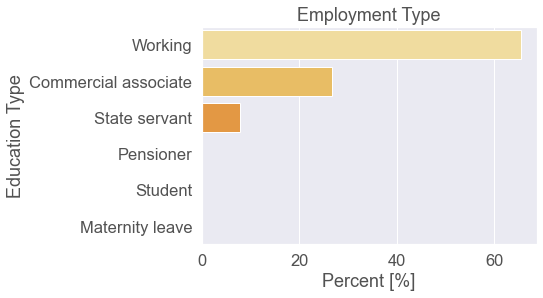

In [64]:
in_type =app['income_type'].value_counts()
in_type_perc= (in_type/app.shape[0])*100
in_type_perc = in_type_perc.sort_values(ascending = False)

ax = sns.barplot(y = in_type_perc.index, x = in_type_perc.values,\
#                 order = ['Lower secondary','Secondary / secondary special','Incomplete higher',
 #                         'Higher education','Academic degree'],\
               palette = ['#fee391','#fec44f','#fe9929','#ec7014','#cc4c02','#8c2d04'])
ax.set(ylabel = 'Education Type', xlabel ='Percent [%]')

ax.set_title('Employment Type', color = '#525252')

plt.savefig('./Figures/empl_type.png', bbox_inches = 'tight')


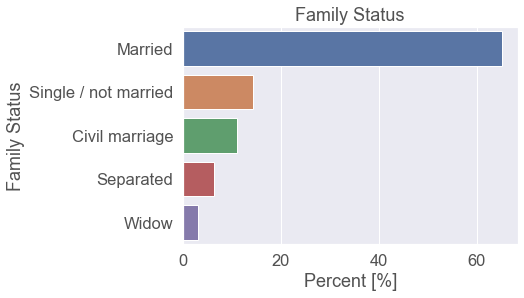

In [65]:
fam =app['family_status'].value_counts()
fam_perc= (fam/app.shape[0])*100
fam_perc = fam_perc.sort_values(ascending = False)

ax = sns.barplot(y = fam_perc.index, x = fam_perc.values,)
#                 order = ['Lower secondary','Secondary / secondary special','Incomplete higher',
 #                         'Higher education','Academic degree'],\
  #               palette = ['#d9f0a3','#addd8e','#78c679','#31a354','#006837'])
ax.set(ylabel = 'Family Status', xlabel ='Percent [%]')

ax.set_title('Family Status', color = '#525252')

plt.savefig('./Figures/family_status.png', bbox_inches = 'tight')


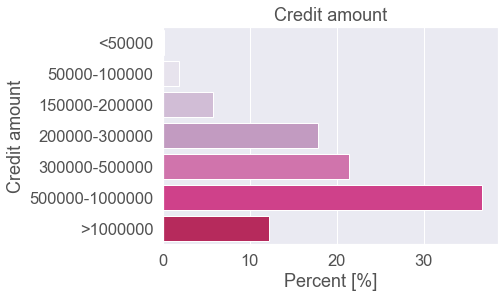

In [76]:
cred =app['credit_range'].value_counts()
cred_perc= (cred/app.shape[0])*100
cred_perc = cred_perc.sort_values(ascending = False)

ax = sns.barplot(y = cred_perc.index, x = cred_perc.values,\
                 order = ['<50000','50000-100000','150000-200000',
                         '200000-300000','300000-500000','500000-1000000', '>1000000'],\
                palette = ['#f7f4f9','#e7e1ef','#d4b9da','#c994c7','#df65b0','#e7298a','#ce1256','#91003f'])
ax.set(ylabel = 'Credit amount', xlabel ='Percent [%]')

ax.set_title('Credit amount', color = '#525252')

plt.savefig('./Figures/credit_amount.png', bbox_inches = 'tight')


92% Cash loans
50% between 30-45
63% Female

80% Upper-Middle Class
74% Secondary education
67% Married
66% Working

In [77]:
cred_perc

500000-1000000    36.682274
300000-500000     21.377579
200000-300000     17.903612
>1000000          12.248748
150000-200000      5.752342
100000-150000      3.928738
50000-100000       1.917447
<50000             0.189259
Name: credit_range, dtype: float64

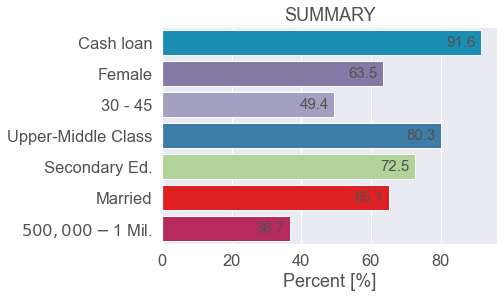

In [72]:
summary = pd.Series([type_credit[0],credit_gender[0],age_perc[0],\
           inc_perc[0],edu_perc[0],fam_perc[0],cred_perc[0]])

summary.index = ['Cash loan','Female','30 - 45','Upper-Middle Class','Secondary Ed.','Married','$500,000-$1 Mil.']
summary

color_summary = ['#009ACD','#8073ac','#9e9ac8', '#2c7fb8','#addd8e','red','#ce1256']
ax = sns.barplot(y = summary.index, x = summary.values,palette = color_summary) 
#                 order = ['Lower secondary','Secondary / secondary special','Incomplete higher',
 #                         'Higher education','Academic degree'],\
  #               
ax.set(xlabel ='Percent [%]')

ax.set_title('SUMMARY', color = '#525252')

#plt.savefig('./Figures/family_status.png', bbox_inches = 'tight')


for p in ax.patches:
    ax.annotate(format(p.get_width(), '.1f'), 
                   ( p.get_width(), p.get_y() + p.get_height() / 2.), 
                   ha = 'center', va = 'center', 
                   size=15,
                   xytext = (-20,0), 
                   textcoords = 'offset points')

plt.savefig('./Figures/SUMMARY.png', bbox_inches = 'tight', dpi = 350)



# WHO DEFAULTS ON THEIR CREDIT?? 


In [21]:
cleanup_nums = {"age_range": {"<30":1, "30-45": 2, "45-60": 3, ">60":4},
               "education": {"Lower secondary": 1, "Incomplete higher": 2, "Secondary / secondary special": 3, \
                            "Incomplete higher": 4, "Higher education": 5, "Academic degree": 6},
               "income_range": {"Low income": 1, "lower-middle class": 2, "middle class": 3, "upper-middle class": 4,\
                               "upper class": 5},
               "credit_range": {"<50000": 1, "50000-100000": 2, "100000-150000": 3, "150000-200000": 4,\
                "200000-300000": 5, "300000-500000":6, "500000-1000000":7, ">1000000":8},
               "status":{"Approved":1 , "Canceled": 2, "Refused": 3, "Unused offer": 4},
               "gender": {'M':1, 'F': 2},
               "goods_range": {"<50000": 1, "50000-100000": 2, "100000-150000": 3, "150000-200000": 4,\
                "200000-300000": 5, "300000-500000":6, "500000-1000000":7, ">1000000":8},
               "family_status": {"Married":1, "Single / not married":2, "Civil marriage": 3, \
                                 "Separated": 4, "Widow": 5},
               "housing": {"House / apartment":1, "With parents":2, "Municipal apartment":3, \
                           "Rented apartment":4, "Office apartment":5, "Co-op apartment":6,},
               'weekday': {"MONDAY":1, "TUESDAY":2, "WEDNESDAY":3, "THURSDAY":4, "FRIDAY":5, "SATURDAY":6, "SUNDAY":7}}

num_app = app.replace(cleanup_nums)

corr = num_app.corr()
corr = round(corr,3)

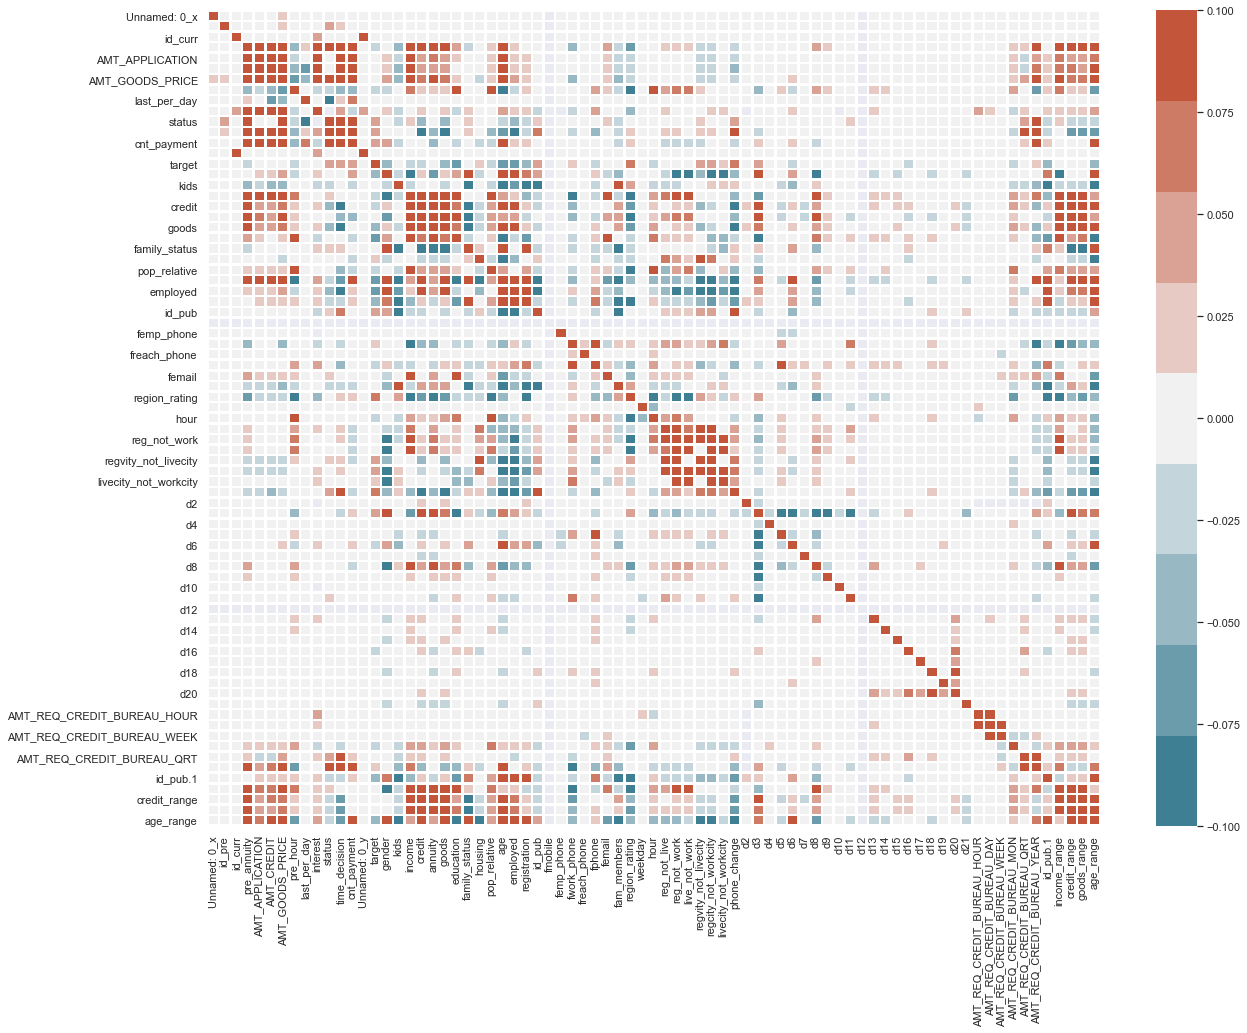

In [22]:
plt.figure(figsize = (20,15))
sns.set(font_scale=1)
ccm = sns.diverging_palette(220, 20, n=9)
 
ax = sns.heatmap(corr, linecolor = 'white', linewidth = 1.5,\
                 vmax = 0.1, vmin = -0.1, annot = False,\
                cmap = ccm)

plt.savefig('./Figures/full_corr_square.png', bbox_inches = 'tight')



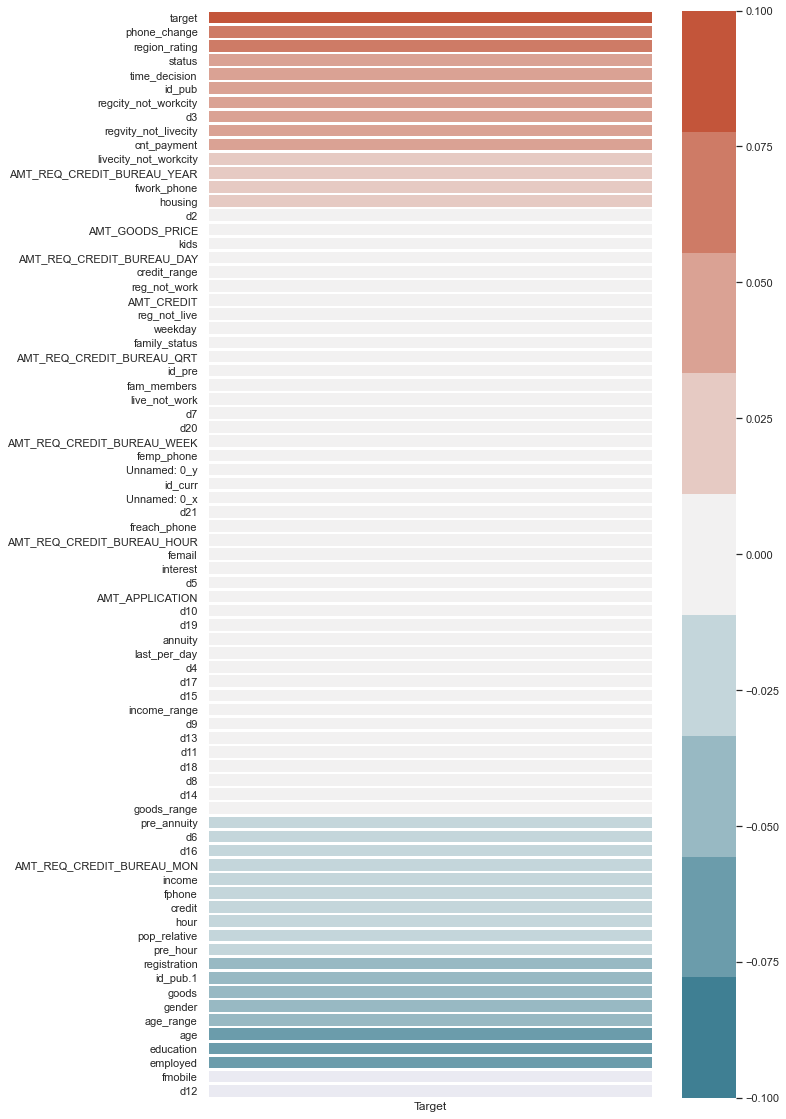

In [23]:
corr = corr[['target']]
corr = round(corr,3).sort_values(by=['target'],ascending = False)


plt.figure(figsize = (10,20))

ccm = sns.diverging_palette(220, 20, n=9)
 
ax = sns.heatmap(corr, linecolor = 'white', linewidth = 1.5,\
                 vmax = 0.1, vmin = -0.1, annot = False,\
                cmap = ccm, xticklabels=False)#, yticklabels = yticklabels)

plt.xlabel("Target") 


plt.savefig('./Figures/target_corr.png', bbox_inches = 'tight')



In [24]:
corr = corr[(corr['target'] >0.015) | (corr['target'] < -0.015)]
corr = corr.iloc[1:-1]


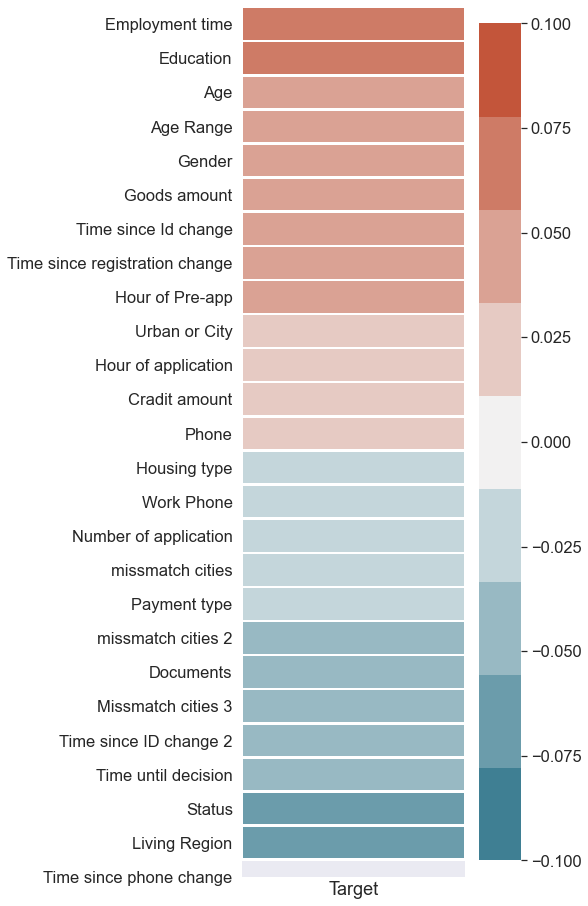

In [25]:
sns.set(font_scale=1.5)

plt.figure(figsize = (5,16))
 
yticklabels = ['Employment time','Education','Age','Age Range','Gender','Goods amount',\
               'Time since Id change','Time since registration change','Hour of Pre-app',\
               'Urban or City','Hour of application','Cradit amount','Phone',\
               'Housing type','Work Phone','Number of application','missmatch cities',\
               'Payment type','missmatch cities 2','Documents','Missmatch cities 3',\
              'Time since ID change 2','Time until decision','Status','Living Region',\
              'Time since phone change']

ax = sns.heatmap(corr, linecolor = 'white', linewidth = 1.5,\
                 vmax = 0.1, vmin = -0.1, annot = False,\
                cmap = ccm, xticklabels=False, yticklabels = yticklabels)

plt.xlabel("Target") 
plt.savefig('./Figures/target_corr_relev.png', bbox_inches = 'tight')


# MALE vs FEMALE

In [81]:
credit_gender[0]-credit_gender[1]

27.06604890655477

In [82]:
tar1 = target1['gender'].value_counts()


tar0 = target0['gender'].value_counts()

total = app['gender'].value_counts()

tar1 = (tar1/total)*100
tar0 = (tar0/total)*100

print(tar1)
print(tar0)
print(total)

M_def = np.array([tar0[1],tar1[1]])
F_def = np.array([tar0[0],tar1[0]])


F     8.498222
M    11.534378
Name: gender, dtype: float64
F    91.501778
M    88.465622
Name: gender, dtype: float64
F    646547
M    371108
Name: gender, dtype: int64


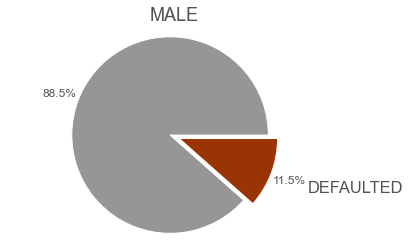

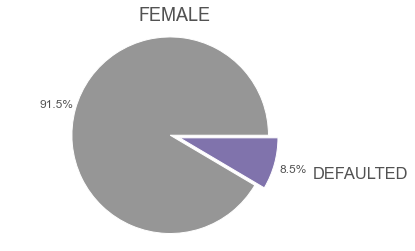

In [83]:
fig, ax = plt.subplots()

plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['text.color'] = '#525252'
plt.rcParams['axes.labelcolor']= '#525252'
plt.rcParams['xtick.color'] = '#525252'
plt.rcParams['ytick.color'] = '#525252'
plt.rcParams['font.size']=12


color_palette_list = ['#969696','#8073ac','#969696','#993404']

labels = ['', 'DEFAULTED']
percentages = M_def
explode=(0.1,0)

ax.pie(percentages, explode=explode, labels=labels,  
       colors=color_palette_list[2:4], autopct='%1.1f%%', 
       shadow=False, startangle=0,   
       pctdistance=1.2,labeldistance=1.4)
ax.axis('equal')
ax.set_title("MALE", color = '#525252')
#ax.legend(frameon=False, bbox_to_anchor=(1.4,1))

plt.savefig('./Figures/male_default.png', bbox_inches = 'tight')


fig, ax = plt.subplots()


percentages = F_def
explode=(0.1,0)

ax.pie(percentages, explode=explode, labels=labels,  
       colors=color_palette_list[0:2], autopct='%1.1f%%', 
       shadow=False, startangle=0,   
       pctdistance=1.2,labeldistance=1.4)
ax.axis('equal')
ax.set_title("FEMALE", color = '#525252')
#ax.legend(frameon=False, bbox_to_anchor=(1.4,1))

plt.savefig('./Figures/female_default.png', bbox_inches = 'tight')


# DEFAULTS BY AGES

In [84]:
# Number of defaults per age range
targ1_age = target1['age_range'].value_counts()
age_total = app['age_range'].value_counts()
targ1_age_perc = (targ1_age/age_total)*100
targ1_age_perc = targ1_age_perc.sort_values(ascending = False)

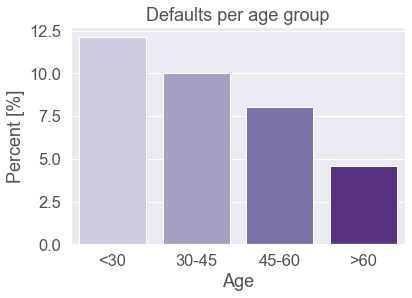

In [85]:
ax = sns.barplot(x = targ1_age_perc.index, y = targ1_age_perc.values,\
                order = ['<30','30-45','45-60','>60'],\
                 palette = ['#cbc9e2','#9e9ac8','#756bb1','#54278f'])
ax.set(xlabel = 'Age', ylabel ='Percent [%]')

ax.set_title('Defaults per age group', color = '#525252')

plt.savefig('./Figures/default_age.png', bbox_inches = 'tight')


In [86]:
targ1_age_perc

<30      12.120337
30-45    10.033928
45-60     8.014933
>60       4.575909
Name: age_range, dtype: float64

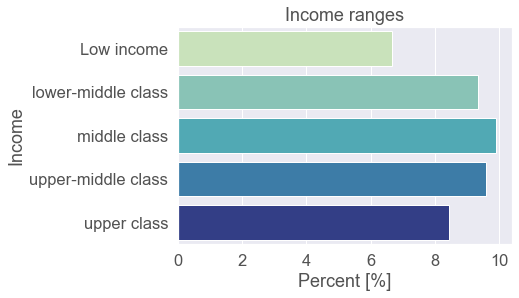

In [87]:

inc = target1['income_range'].value_counts()
inc_total = app['income_range'].value_counts()
inc_perc = (inc/inc_total)*100
inc_perc = inc_perc.sort_values(ascending = False)

ax = sns.barplot(y = inc_perc.index, x = inc_perc.values,\
                order = ['Low income','lower-middle class','middle class',\
                                'upper-middle class','upper class'],\
                 palette = ['#c7e9b4','#7fcdbb','#41b6c4','#2c7fb8','#253494'])
ax.set(ylabel = 'Income', xlabel ='Percent [%]')

ax.set_title('Income ranges', color = '#525252')

plt.savefig('./Figures/default_income.png', bbox_inches = 'tight')


In [88]:
inc_perc

middle class          9.915422
upper-middle class    9.603056
lower-middle class    9.327423
upper class           8.430933
Low income            6.666667
Name: income_range, dtype: float64

# Default by education


In [89]:
edu_perc

Secondary / secondary special    72.537648
Higher education                 22.808319
Incomplete higher                 3.671185
Lower secondary                   0.943345
Academic degree                   0.039503
Name: education, dtype: float64

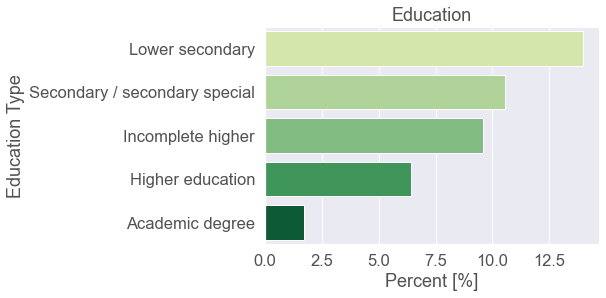

In [90]:
edu = target1['education'].value_counts()
total = app['education'].value_counts()
edu_perc = (edu/total)*100
edu_perc = edu_perc.sort_values(ascending = False)

ax = sns.barplot(y = edu_perc.index, x = edu_perc.values,\
                 order = ['Lower secondary','Secondary / secondary special','Incomplete higher',
                          'Higher education','Academic degree'],\
                 palette = ['#d9f0a3','#addd8e','#78c679','#31a354','#006837'])
ax.set(ylabel = 'Education Type', xlabel ='Percent [%]')

ax.set_title('Education', color = '#525252')

plt.savefig('./Figures/default_education.png', bbox_inches = 'tight')


# Defaults by credit amount 

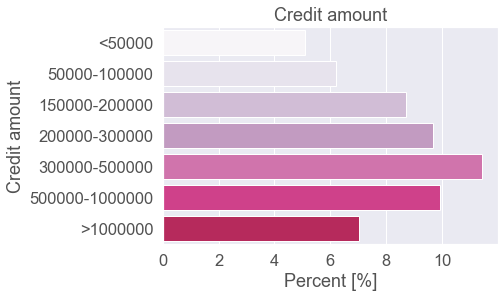

In [91]:
cred = target1['credit_range'].value_counts()
total = app['credit_range'].value_counts()
cred_perc= (cred/total)*100
cred_perc = cred_perc.sort_values(ascending = False)

ax = sns.barplot(y = cred_perc.index, x = cred_perc.values,\
                 order = ['<50000','50000-100000','150000-200000',
                         '200000-300000','300000-500000','500000-1000000', '>1000000'],\
                palette = ['#f7f4f9','#e7e1ef','#d4b9da','#c994c7','#df65b0','#e7298a','#ce1256','#91003f'])
ax.set(ylabel = 'Credit amount', xlabel ='Percent [%]')

ax.set_title('Credit amount', color = '#525252')

plt.savefig('./Figures/default_credit_amount.png', bbox_inches = 'tight')


In [92]:
cred_perc

300000-500000     11.425879
500000-1000000     9.946718
200000-300000      9.669753
150000-200000      8.722390
100000-150000      7.391011
>1000000           7.039711
50000-100000       6.200994
<50000             5.088266
Name: credit_range, dtype: float64

In [93]:
edu_perc

Lower secondary                  13.989583
Secondary / secondary special    10.548197
Incomplete higher                 9.590471
Higher education                  6.441773
Academic degree                   1.741294
Name: education, dtype: float64

# SUMMARY

11.5% Men
12.1% < 30
9% middle class
14% Lower Sec. 
11.5% $300,000 and 500,000

In [94]:
summary = pd.Series([M_def[1],targ1_age_perc[0],\
           9.5,edu_perc[0],cred_perc[0]])

summary

0    11.534378
1    12.120337
2     9.500000
3    13.989583
4    11.425879
dtype: float64

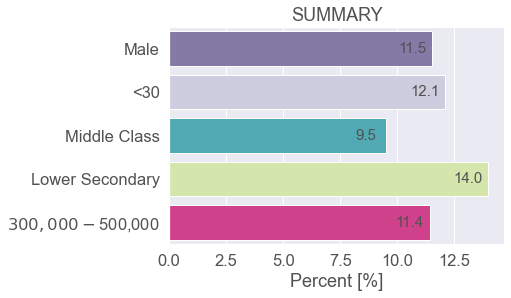

In [95]:
summary.index = ['Male','<30','Middle Class','Lower Secondary','$300,000 - $500,000']

color_summary = ['#8073ac','#cbc9e2','#41b6c4', '#d9f0a3','#e7298a']
ax = sns.barplot(y = summary.index, x = summary.values,palette = color_summary) 
#                 order = ['Lower secondary','Secondary / secondary special','Incomplete higher',
 #                         'Higher education','Academic degree'],\
  #               
ax.set(xlabel ='Percent [%]')
ax.set_title('SUMMARY', color = '#525252')

#plt.savefig('./Figures/family_status.png', bbox_inches = 'tight')


for p in ax.patches:
    ax.annotate(format(p.get_width(), '.1f'), 
                   ( p.get_width(), p.get_y() + p.get_height() / 2.), 
                   ha = 'center', va = 'center', 
                   size=15,
                   xytext = (-20,0), 
                   textcoords = 'offset points')

plt.savefig('./Figures/default_SUMMARY.png', bbox_inches = 'tight', dpi=300)



In [97]:
target1['credit'].mean() - target0['credit'].mean()

-27096.145600401214

# Previous applications

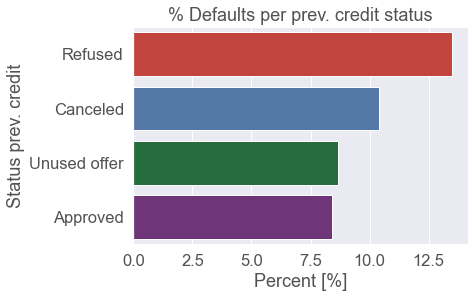

In [102]:
status = target1['status'].value_counts()
total = app['status'].value_counts()
status_perc= (status/total)*100
status_perc = status_perc.sort_values(ascending = False)

ax = sns.barplot(y = status_perc.index, x = status_perc.values,\
                 palette = ['#d73027','#4575b4','#1b7837','#762a83'])
ax.set(ylabel = 'Status prev. credit', xlabel ='Percent [%]', title = '% Defaults per prev. credit status')

plt.savefig('./Figures/default_prev_status.png', bbox_inches = 'tight', dpi=300)



# Who is more often rejected? 

F    103013
M     62895
Name: gender, dtype: int64
F    15.93
M    16.95
Name: gender, dtype: float64


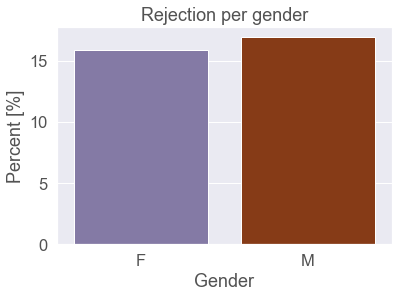

In [112]:
rej_gender = rej['gender'].value_counts()
print(rej_gender)
total_men_apps = men.shape[0]
total_women_apps = women.shape[0]

rej_gender_per[1] = round((rej_gender[1]/total_men_apps)*100,2)
rej_gender_per[0] = round((rej_gender[0]/total_women_apps)*100,2)

print(rej_gender_per)


ax = sns.barplot(x = rej_gender_per.index, y = rej_gender_per.values,\
                order = ['F','M'],\
                 palette = ['#8073ac', '#993404'])
ax.set(xlabel = 'Gender', ylabel ='Percent [%]', title = 'Rejection per gender')

plt.savefig('./Figures/rej_gender.png', bbox_inches = 'tight', dpi=300)



# Rejection per Age Group

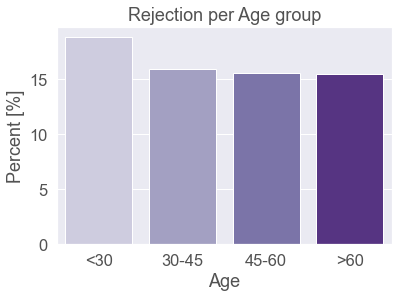

In [115]:
rej_age = rej['age_range'].value_counts()
total_age = app['age_range'].value_counts()

rej_age_per = round((rej_age/total_age)*100,2)


ax = sns.barplot(x = rej_age_per.index, y = rej_age_per.values,\
                 order = ['<30','30-45','45-60','>60'],\
                 palette = ['#cbc9e2','#9e9ac8','#756bb1','#54278f'])

ax.set(xlabel = 'Age', ylabel ='Percent [%]', title = 'Rejection per Age group')

plt.savefig('./Figures/rej_age.png', bbox_inches = 'tight', dpi=300)


# Rejection per Income

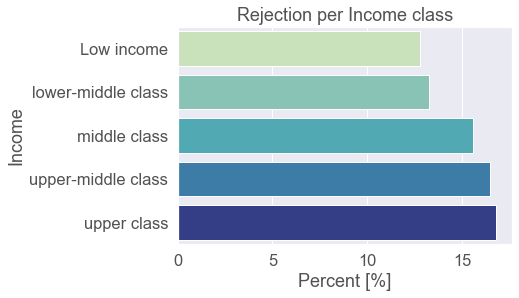

In [117]:
rej_inc = rej['income_range'].value_counts()
total_inc = app['income_range'].value_counts()

rej_inc_per = round((rej_inc/total_inc)*100,2)


ax = sns.barplot(y = rej_inc_per.index, x = rej_inc_per.values,\
                 order = ['Low income','lower-middle class','middle class',\
                                'upper-middle class','upper class'],\
                 palette = ['#c7e9b4','#7fcdbb','#41b6c4','#2c7fb8','#253494'])

ax.set(ylabel = 'Income', xlabel ='Percent [%]', title = 'Rejection per Income class')

plt.savefig('./Figures/rej_income.png', bbox_inches = 'tight', dpi=300)

# Rejection per Education level

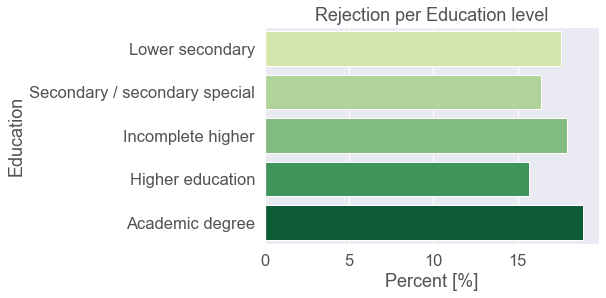

In [123]:
rej_edu = rej['education'].value_counts()
total_edu = app['education'].value_counts()

rej_edu_per = round((rej_edu/total_edu)*100,2)


ax = sns.barplot(y = rej_edu_per.index, x = rej_edu_per.values,\
                 order = ['Lower secondary','Secondary / secondary special','Incomplete higher',
                          'Higher education','Academic degree'],\
                 palette = ['#d9f0a3','#addd8e','#78c679','#31a354','#006837'])

ax.set(ylabel = 'Education', xlabel ='Percent [%]', title = 'Rejection per Education level')

plt.savefig('./Figures/rej_education.png', bbox_inches = 'tight', dpi=300)

# Rejections per Credit amount

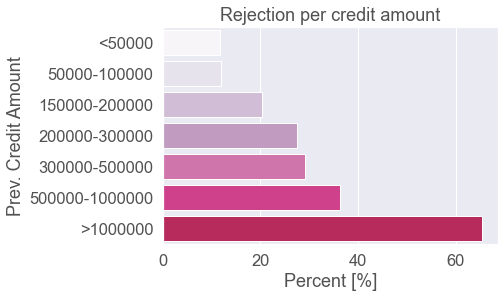

In [122]:
#rej.columns
#'pre_credit_range'
rej_cred = rej['pre_credit_range'].value_counts()
total_cred = app['pre_credit_range'].value_counts()

rej_cred_per = round((rej_cred/total_cred)*100,2)


ax = sns.barplot(y = rej_cred_per.index, x = rej_cred_per.values,\
                 order = ['<50000','50000-100000','150000-200000',
                         '200000-300000','300000-500000','500000-1000000', '>1000000'],\
                palette = ['#f7f4f9','#e7e1ef','#d4b9da','#c994c7','#df65b0','#e7298a','#ce1256','#91003f'])

ax.set(ylabel = 'Prev. Credit Amount', xlabel ='Percent [%]', title = 'Rejection per credit amount')

plt.savefig('./Figures/rej_cred.png', bbox_inches = 'tight', dpi=300)